<a href="https://colab.research.google.com/github/Simran250306/CodeAI-MicrosoftReskillInternship/blob/main/AlgorithmsML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("/content/Salary_Data.csv")

In [4]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [5]:
df.info

<bound method DataFrame.info of     YearsExperience  Salary
0               1.1   39343
1               1.3   46205
2               1.5   37731
3               2.0   43525
4               2.2   39891
5               2.9   56642
6               3.0   60150
7               3.2   54445
8               3.2   64445
9               3.7   57189
10              3.9   63218
11              4.0   55794
12              4.0   56957
13              4.1   57081
14              4.5   61111
15              4.9   67938
16              5.1   66029
17              5.3   83088
18              5.9   81363
19              6.0   93940
20              6.8   91738
21              7.1   98273
22              7.9  101302
23              8.2  113812
24              8.7  109431
25              9.0  105582
26              9.5  116969
27              9.6  112635
28             10.3  122391
29             10.5  121872>

In [6]:
#Normalize the data using MinMaxScaler
scaler = MinMaxScaler()
df[['YearsExperience', 'Salary']] = scaler.fit_transform(df[['YearsExperience', 'Salary']])

In [7]:
df.head()

,YearsExperience,Salary
0,0.000000,0.019041
1,0.021277,0.100094
2,0.042553,0.000000
3,0.095745,0.068438
4,0.117021,0.025514


In [8]:
#split data into features (x) and target (y)
X = df[['YearsExperience']]
y = df['Salary']

In [9]:
#train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state= 42)

In [10]:
#train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
#evaluate the model
y_pred = model.predict(X_test)

#calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')

Mean Squared Error: 0.005271801128195494
Mean Absolute Error: 0.06096537574297404
Root Mean Squared Error: 0.0726071699503258


In [12]:
#print the coefficient
print(f'Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')

Coefficients: [1.03694033]
Intercept: -0.018185350447792126


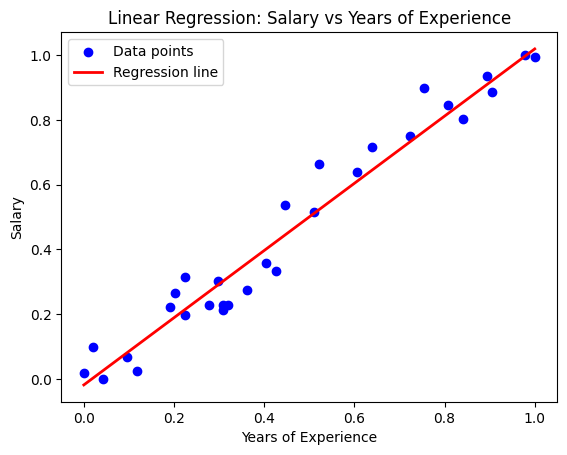

In [13]:
#visualize the regression line
#plotting original data points
plt.scatter(X, y, color='blue', label='Data points')

#plotting regression line
plt.plot(X, model.predict(X),color='red', linewidth=2, label='Regression line')

#adding labels and title
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Linear Regression: Salary vs Years of Experience')

#adding legend
plt.legend()

plt.show()

LOGISTIC REGRESSION

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
#convert salary to binary class
threshold = df['Salary'].median()
df['SalaryClass'] = (df['Salary'] > threshold).astype(int)

In [16]:
print(df)

    YearsExperience    Salary  SalaryClass
0          0.000000  0.019041            0
1          0.021277  0.100094            0
2          0.042553  0.000000            0
3          0.095745  0.068438            0
4          0.117021  0.025514            0
5          0.191489  0.223376            0
6          0.202128  0.264812            0
7          0.223404  0.197425            0
8          0.223404  0.315545            0
9          0.276596  0.229837            0
10         0.297872  0.301051            0
11         0.308511  0.213359            0
12         0.308511  0.227097            0
13         0.319149  0.228561            0
14         0.361702  0.276163            0
15         0.404255  0.356804            1
16         0.425532  0.334255            1
17         0.446809  0.535755            1
18         0.510638  0.515379            1
19         0.521277  0.663938            1
20         0.606383  0.637928            1
21         0.638298  0.715119            1
22         

In [17]:
#Normalize the data using MinMax Scaler
scaler = MinMaxScaler()
df[['YearsExperience']] = scaler.fit_transform(df[['YearsExperience']])

In [18]:
X = df[['YearsExperience']]
y = df['SalaryClass']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [21]:
#evaluate model
y_pred = model.predict(X_test)

#calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.6666666666666666
Confusion Matrix:
[[2 0]
 [2 2]]
Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       1.00      0.50      0.67         4

    accuracy                           0.67         6
   macro avg       0.75      0.75      0.67         6
weighted avg       0.83      0.67      0.67         6



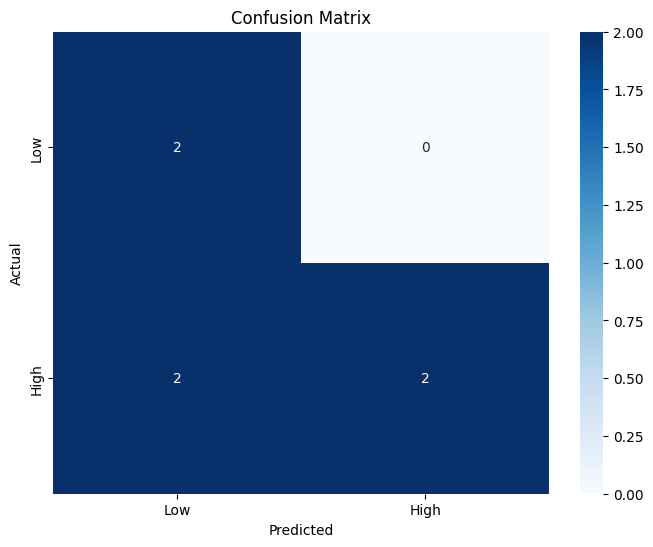

In [22]:
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap='Blues',xticklabels=['Low','High'],yticklabels=['Low','High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

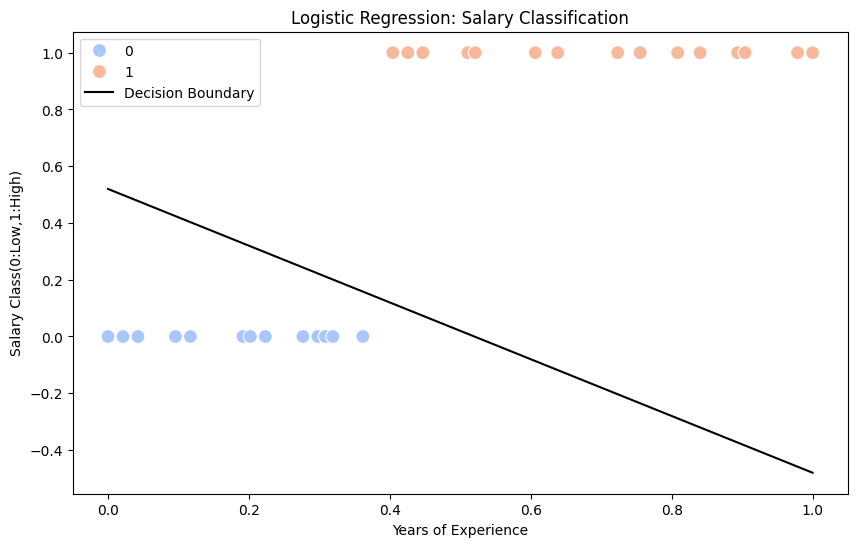

In [23]:
#visualize decision boundary
plt.figure(figsize=(10,6))
sns.scatterplot(x='YearsExperience',y='SalaryClass',data=df, hue='SalaryClass',palette='coolwarm',s=100)
x_values = np.linspace(X['YearsExperience'].min(),X['YearsExperience'].max(),200)
y_values = -(model.intercept_ + model.coef_[0] * x_values) / model.coef_[0][0]
plt.plot(x_values, y_values, label='Decision Boundary',color='black')

plt.xlabel('Years of Experience')
plt.ylabel('Salary Class(0:Low,1:High)')
plt.title('Logistic Regression: Salary Classification')

plt.legend()
plt.show()